In [1]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.utils import resample
from scipy.stats import sem, t


In [2]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)

In [3]:
# For Windows authentication
# Replace the server argument with the Server Name found when logging into SQL Server Management Studio 
# OR
# For SQL Server authentication
# Replace the server, user and password argument with the Server Name, username and password
engine = new_engine('mssql', 'MUSTAF', 'CrimeNotificationSystem', integrated_security=True)

mssql://MUSTAF/CrimeNotificationSystem?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


In [4]:
print(type(engine))


<class 'sqlalchemy.engine.base.Engine'>


In [5]:
connection = engine.connect()
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [7]:

sql_query = """
SELECT  top 1 TimeOfDay      
from CrimeEvents;

"""
df = pd.read_sql_query(sql_query, con=connection)
print(df)

     TimeOfDay
0  Eftermiddag


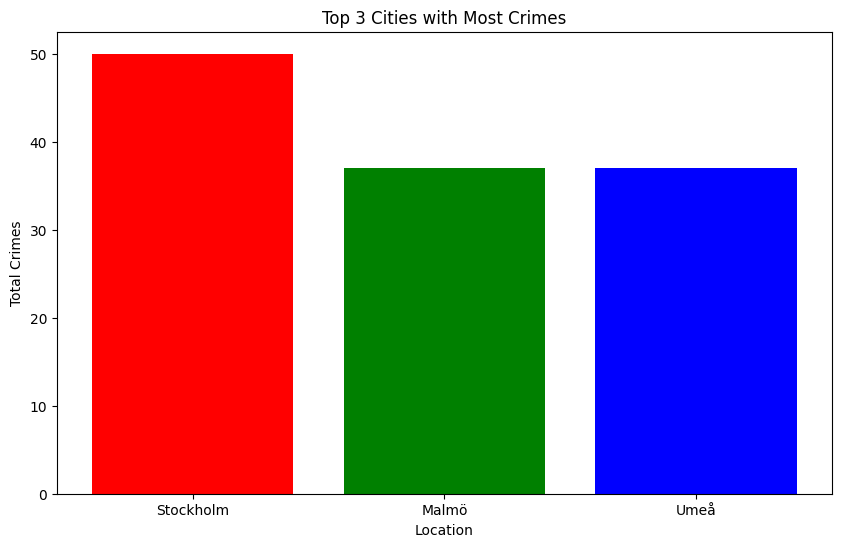

In [20]:
# top 3 städer med brott
sql_query = """
SELECT TOP 3 Location,
       COUNT(CrimeID) AS TotalCrimes
FROM CrimeEvents
GROUP BY Location
ORDER BY TotalCrimes DESC;
"""
df = pd.read_sql_query(sql_query, con=connection)
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create the bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
plt.bar(df['Location'], df['TotalCrimes'], color=colors[:len(df['Location'])])
plt.xlabel('Location')
plt.ylabel('Total Crimes')
plt.title('Top 3 Cities with Most Crimes')
plt.show()

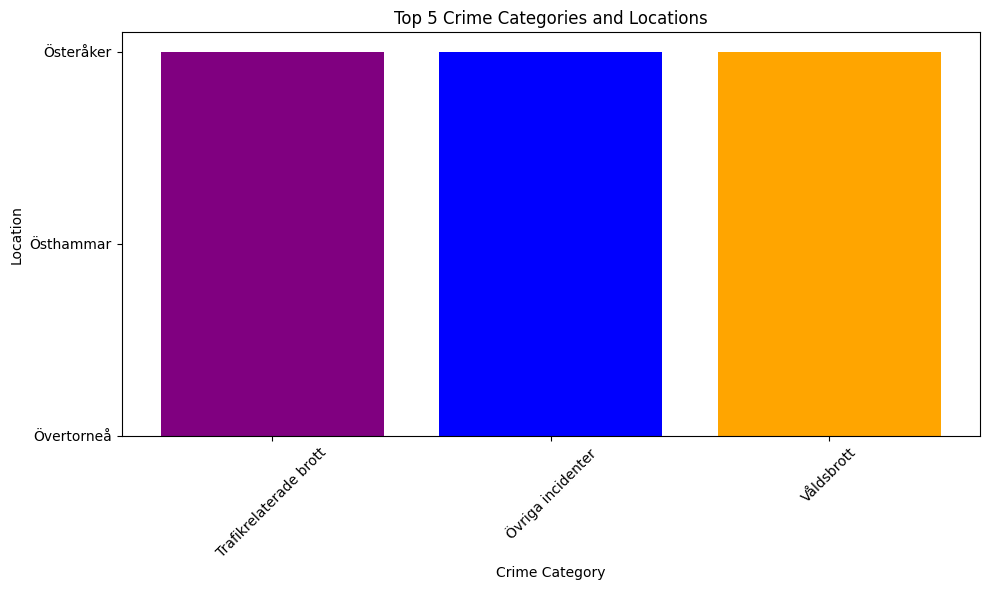

In [21]:
# top 5 brott category med pltas och tid 
sql_query = """ 
SELECT top 5 CrimeCategory  as MostCrimes, 
      Location,
	  TimeOfDay,
	  EventName
from CrimeEvents
order by Location DESC;

"""
df = pd.read_sql_query(sql_query, con=connection)

colors = ['red', 'green', 'blue', 'orange', 'purple']


plt.figure(figsize=(10, 6))
plt.bar(df['MostCrimes'], df['Location'], color=colors[:len(df['MostCrimes'])])
plt.xlabel('Crime Category')
plt.ylabel('Location')
plt.title('Top 5 Crime Categories and Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

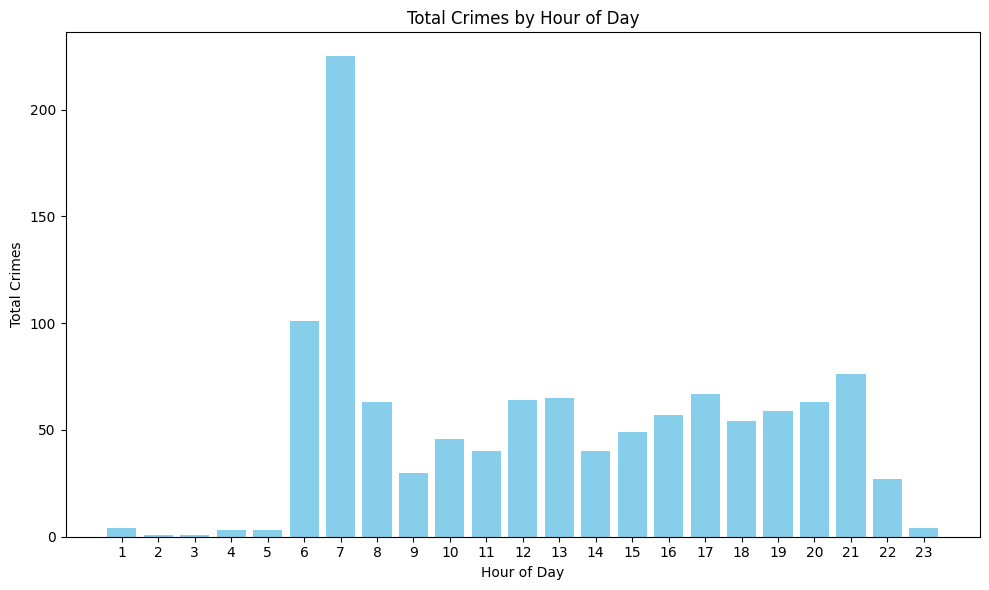

In [22]:
# vilken tid är som vanligast att pågår brott.

sql_query = """
SELECT DATEPART(HOUR, EventDate) AS HourOfDay, 
       COUNT(CrimeID) AS TotalCrimes
FROM CrimeEvents
GROUP BY DATEPART(HOUR, EventDate)
ORDER BY TotalCrimes DESC;
"""
df = pd.read_sql_query(sql_query, con=connection)


plt.figure(figsize=(10, 6))
plt.bar(df['HourOfDay'], df['TotalCrimes'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Hour of Day')
plt.xticks(df['HourOfDay']) 
plt.tight_layout()
plt.show()

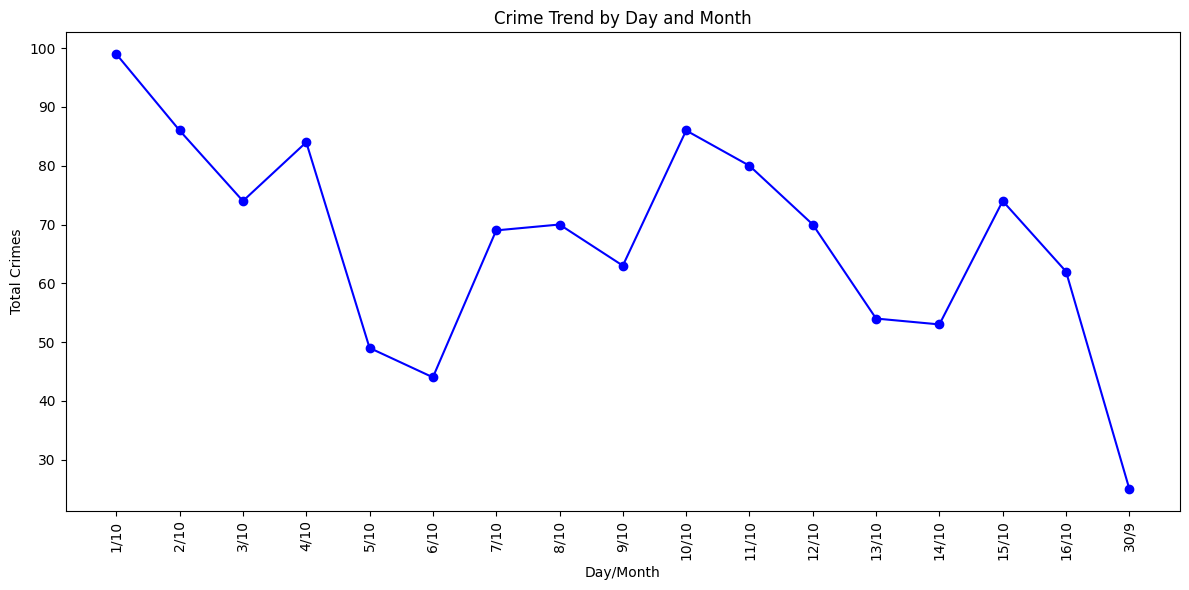

In [23]:
#  dag trend 
sql_query = """
SELECT day(EventDate) AS day, 
       MONTH(EventDate) AS Month, 
       COUNT(CrimeID) AS TotalCrimes
FROM CrimeEvents
GROUP BY day(EventDate), MONTH(EventDate)
ORDER BY day, Month;
"""
df = pd.read_sql_query(sql_query, con=connection)
df['DayMonth'] = df['day'].astype(str) + '/' + df['Month'].astype(str)

# line plot
plt.figure(figsize=(12, 6))
plt.plot(df['DayMonth'], df['TotalCrimes'], marker='o', color='b')
plt.xticks(rotation=90) 
plt.xlabel('Day/Month')
plt.ylabel('Total Crimes')
plt.title('Crime Trend by Day and Month')
plt.tight_layout()
plt.show()

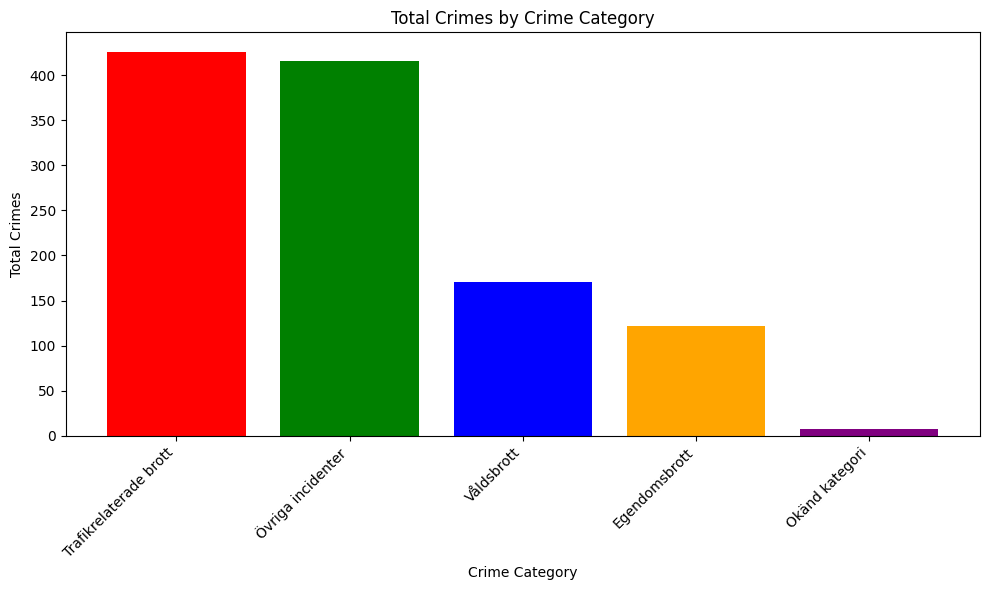

In [19]:
# vad är mest catgorey brott om händer.
sql_query = """
SELECT CrimeCategory, 
       COUNT(CrimeID) AS TotalCrimes
FROM CrimeEvents
GROUP BY CrimeCategory
ORDER BY TotalCrimes DESC;
"""
df = pd.read_sql_query(sql_query, con=connection)

colors = ['red', 'green', 'blue', 'orange', 'purple']


plt.figure(figsize=(10, 6))
plt.bar(df['CrimeCategory'], df['TotalCrimes'], color=colors[:len(df['CrimeCategory'])])
plt.xlabel('Crime Category')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Crime Category')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
